<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/chollet/chapter04_imdb_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Charpter 3.4.  Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

The loss function compares predictions to the targets producing a loss value.  The optimizer uses the loss value to update the network's weights. Weights are one or more tensors learned with stochastic gradient descent.  

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
train_labels[0]

1

In [3]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [5]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

* A **relu** is a function means to zero out negative values.

* A **sigmoind** squashes then into the range [0,1].

An activation needs a non-linearity.  Otherwise the output = dot(W, input)+ b could only learn linear transformations.  


In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

Use binary_crossentropy for a two-class classification problem.  Mean square errors for regression.

In [9]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [11]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 105ms/step - loss: 0.5285 - accuracy: 0.7823 - val_loss: 0.4096 - val_accuracy: 0.8558
Epoch 2/20
30/30 [==============================] - 2s 51ms/step - loss: 0.3356 - accuracy: 0.8903 - val_loss: 0.3234 - val_accuracy: 0.8816
Epoch 3/20
30/30 [==============================] - 3s 95ms/step - loss: 0.2549 - accuracy: 0.9153 - val_loss: 0.2903 - val_accuracy: 0.8870
Epoch 4/20
30/30 [==============================] - 3s 87ms/step - loss: 0.2092 - accuracy: 0.9311 - val_loss: 0.2811 - val_accuracy: 0.8862
Epoch 5/20
30/30 [==============================] - 2s 55ms/step - loss: 0.1723 - accuracy: 0.9433 - val_loss: 0.2753 - val_accuracy: 0.8888
Epoch 6/20
30/30 [==============================] - 2s 55ms/step - loss: 0.1489 - accuracy: 0.9527 - val_loss: 0.2814 - val_accuracy: 0.8847
Epoch 7/20
30/30 [==============================] - 2s 62ms/step - loss: 0.1301 - accuracy: 0.9588 - val_loss: 0.2889 - val_accuracy: 0.8852
Epoch 8/20
3

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

This shows overfitting as the loss and accuracy flatten out after 4 epochs.  Thus the model learns characteristics of the training data that might not be prevent in subsequeny testing data.  This is the classific definition of **overfitting**.  

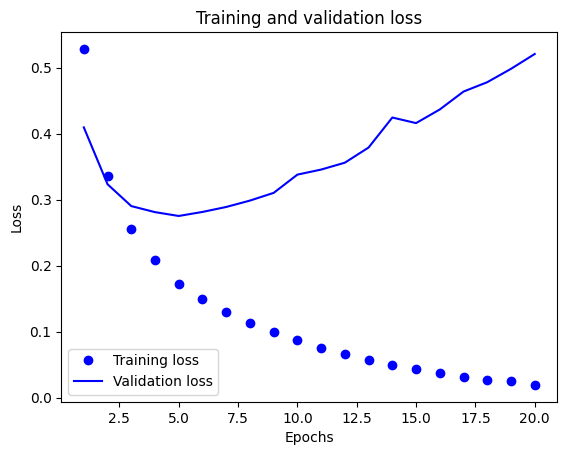

In [13]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

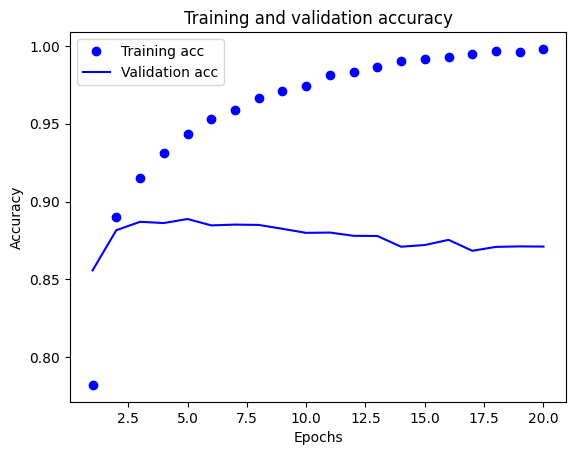

In [14]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 27ms/step - loss: 0.4871 - accuracy: 0.8045
Epoch 2/4
49/49 [==============================] - 2s 33ms/step - loss: 0.2881 - accuracy: 0.9011
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2223 - accuracy: 0.9212
Epoch 4/4
782/782 [==============================] - 5s 5ms/step - loss: 0.2838 - accuracy: 0.8882


In [16]:
results

[0.2837660014629364, 0.8882399797439575]

### Using a trained model to generate predictions on new data

In [17]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.20112087],
       [0.9999289 ],
       [0.72564423],
       ...,
       [0.10056213],
       [0.09159667],
       [0.56479275]], dtype=float32)